# Exercício 1 - PMR3508
## Classificador KNN para a base *adult*

### Parte 1: Limpando os dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
train_data = pd.read_csv('train_data.csv', 
                         index_col='Id',
                         na_values='?',
                         engine='python', 
                         sep=r'\s*,\s*')

In [3]:
train_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
Id,,,,,,,,,,,,,,,
16280,34,Private,204991,Some-college,10,Divorced,Exec-managerial,Own-child,White,Male,0,0,44,United-States,<=50K
16281,58,Local-gov,310085,10th,6,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,40,United-States,<=50K
16282,25,Private,146117,Some-college,10,Never-married,Machine-op-inspct,Not-in-family,White,Male,0,0,42,United-States,<=50K
16283,24,Private,138938,Some-college,10,Divorced,Adm-clerical,Not-in-family,White,Female,0,0,40,United-States,<=50K
16284,57,Self-emp-inc,258883,HS-grad,9,Married-civ-spouse,Transport-moving,Husband,White,Male,5178,0,60,Hungary,>50K


In [4]:
train_data.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


Conferindo campos numéricos e não-numéricos:

In [5]:
train_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education.num      int64
marital.status    object
occupation        object
relationship      object
race              object
sex               object
capital.gain       int64
capital.loss       int64
hours.per.week     int64
native.country    object
income            object
dtype: object

Conferindo número de linhas e colunas:

In [6]:
train_data.shape

(32560, 15)

Conferindo em quais colunas há campos nulos:

In [7]:
train_data.isnull().any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

Algumas das colunas possuem linhas com dados faltantes. Elas serão eliminadas! 

In [8]:
train_data = train_data.dropna()

In [9]:
train_data.shape

(30161, 15)

Poucas linhas foram perdidas: 2399, o que corresponde a 6,7% de toda a base. Consideramos que a perda é irrelevante.

### Parte 2: Explorando os dados

Conferindo o número de classes por atributo não numérico:

In [67]:
notnum = train_data[['workclass','education','marital.status','occupation','relationship','race','sex','native.country','income']]
notnum.nunique()

workclass          7
education         16
marital.status     7
occupation        14
relationship       6
race               5
sex                2
native.country    41
income             2
dtype: int64

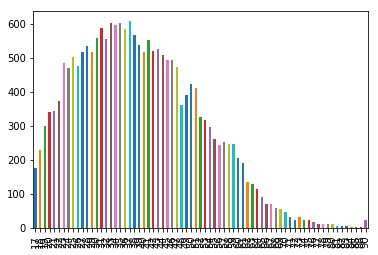

In [68]:
plt.figure()
x = train_data.loc[train_data['sex']=='Male']
x["age"].value_counts().sort_index().plot(kind="bar")

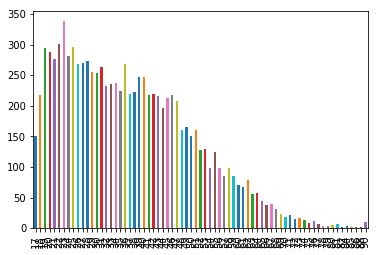

In [69]:
x = train_data.loc[train_data['sex']=='Female']
x["age"].value_counts().sort_index().plot(kind="bar")

![Age Distribuition, 2000](http://www.censusscope.org/us/chart_age_graph_1.gif)

Como ilustrado acima, a distribuição de idade da base é semelhante à distribuição da população americana no ano de 2000.

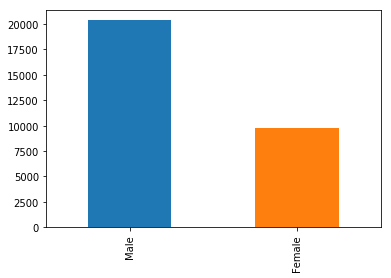

In [70]:
train_data["sex"].value_counts().plot(kind="bar")

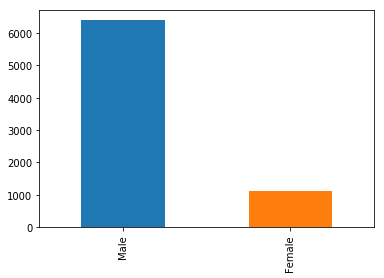

In [71]:
y = train_data.loc[train_data["income"]=='>50K']
y["sex"].value_counts().plot(kind="bar")

O sexo masculino é predominante dentre aqueles que possuem *income* >50K.

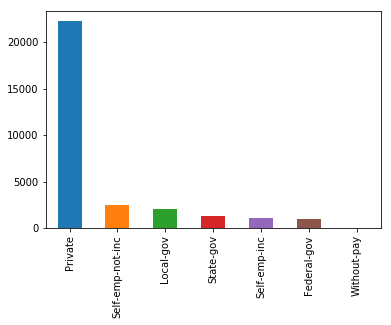

In [72]:
train_data["workclass"].value_counts().plot(kind="bar")

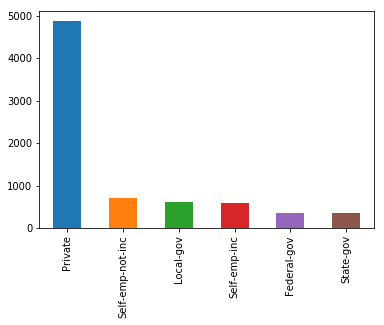

In [24]:
y = train_data.loc[train_data["income"]=='>50K']
y["workclass"].value_counts().plot(kind="bar")

Os empregados no setor privado são maioria dentre os que possuem *income* >50K, no entanto a distribuição é praticamente identica à da população total.

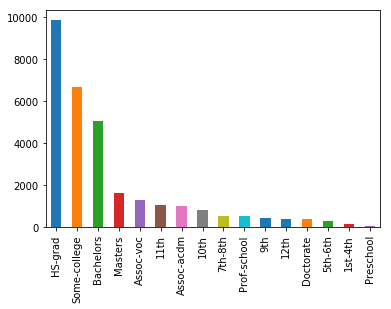

In [73]:
train_data["education"].value_counts().plot(kind="bar")

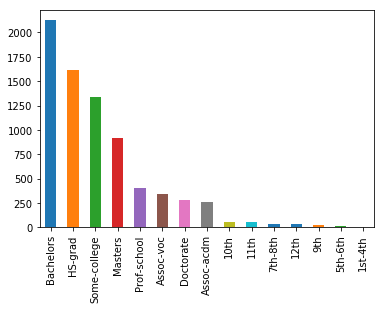

In [74]:
y = train_data.loc[train_data["income"]=='>50K']
y["education"].value_counts().plot(kind="bar")

A grande maioria dentre os que ganham mais que 50K possuem nivel de educação dentre as quatro primeiras classes do gráfico acima.

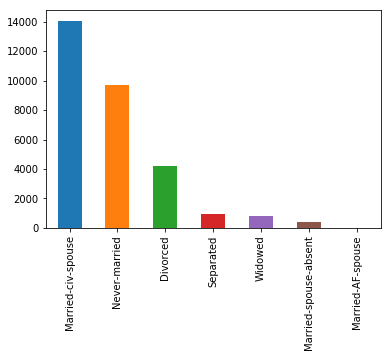

In [75]:
train_data["marital.status"].value_counts().plot(kind="bar")

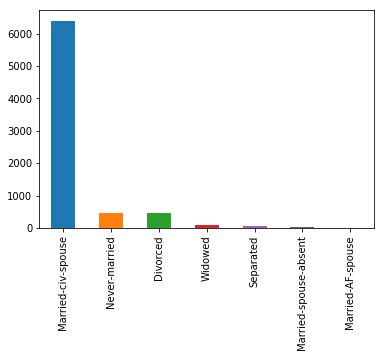

In [76]:
y = train_data.loc[train_data["income"]=='>50K']
y["marital.status"].value_counts().plot(kind="bar")

Dentre os que ganham mais que 50K, a grande maioria é casado no estado civil.

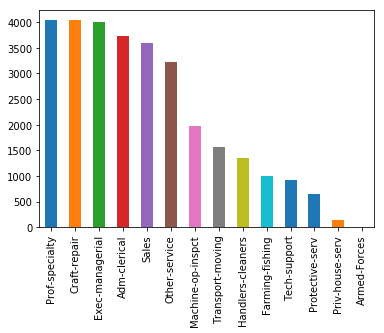

In [77]:
train_data["occupation"].value_counts().plot(kind="bar")

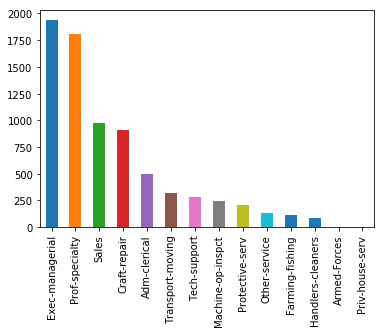

In [78]:
y = train_data.loc[train_data["income"]=='>50K']
y["occupation"].value_counts().plot(kind="bar")

A grande maioria dentre os que ganham mais que 50K possuem ocupação dentre as cinco primeiras classes do gráfico acima.

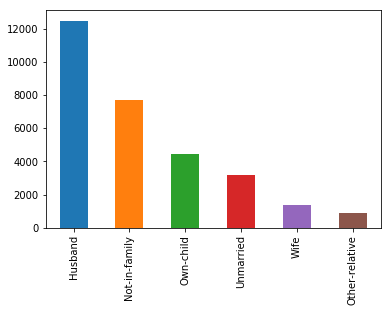

In [79]:
train_data["relationship"].value_counts().plot(kind="bar")

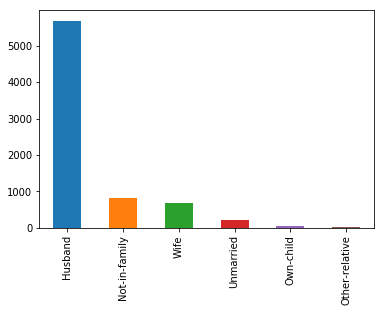

In [80]:
y = train_data.loc[train_data["income"]=='>50K']
y["relationship"].value_counts().plot(kind="bar")

A grande maioria dos que ganham mais que 50K apresentam **relationship** = "Husband".

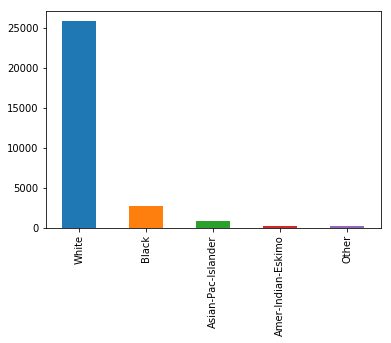

In [81]:
train_data["race"].value_counts().plot(kind="bar")

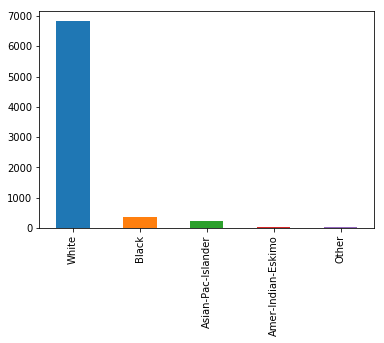

In [82]:
y = train_data.loc[train_data["income"]=='>50K']
y["race"].value_counts().plot(kind="bar")

A grande maioria dentre os que ganham mais que 50K são brancos.

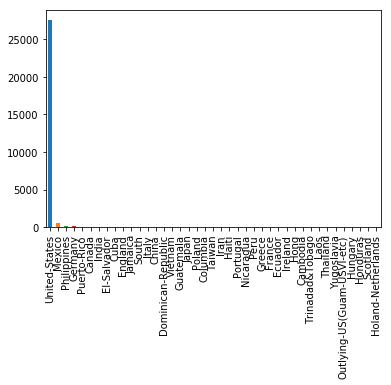

In [83]:
train_data["native.country"].value_counts().plot(kind="bar")

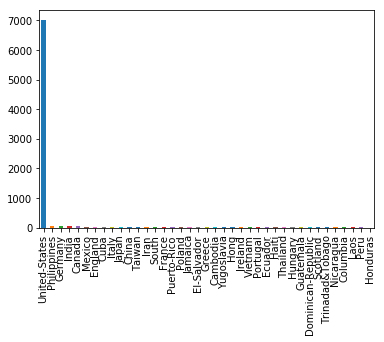

In [84]:
y = train_data.loc[train_data["income"]=='>50K']
y["native.country"].value_counts().plot(kind="bar")

A esmagadora maioria dentre os que ganham mais que 50K possuem nacionalidade norte americana, no entando o espaço amostra segue a mesma distribuição.

### Parte 3: *Feature Engineering*

Para se definir quais os atributos serão utilziados será feita uma análise de correlação entre os atributos e a variável de classe, de modo a escolher a melhor solução possível. Para tratar os campos não numéricos, a função *get dummies* do pandas será utilizada.

In [85]:
train_data_teste = pd.get_dummies(train_data)
analise = train_data_teste.corr().loc[:,'income_>50K'].sort_values(ascending=True)
analise

income_<=50K                           -1.000000
marital.status_Never-married           -0.320038
relationship_Own-child                 -0.226196
sex_Female                             -0.216715
relationship_Not-in-family             -0.193236
occupation_Other-service               -0.165942
relationship_Unmarried                 -0.145807
education_HS-grad                      -0.136152
marital.status_Divorced                -0.132038
workclass_Private                      -0.117256
occupation_Adm-clerical                -0.099811
occupation_Handlers-cleaners           -0.093841
race_Black                             -0.088338
education_11th                         -0.084526
relationship_Other-relative            -0.084461
occupation_Machine-op-inspct           -0.075917
marital.status_Separated               -0.074060
education_10th                         -0.068425
native.country_Mexico                  -0.064738
education_Some-college                 -0.060272
marital.status_Widow

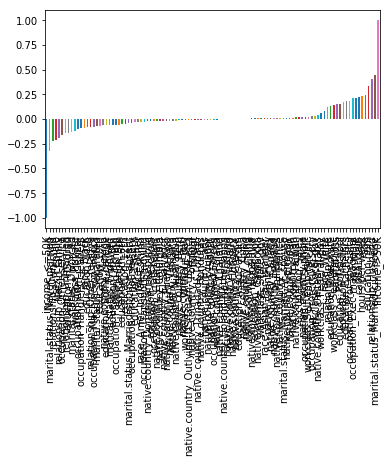

In [86]:
analise.plot(kind='bar')

Os atributos com o módulo da correlação maior que 0.15 serão escolhidos:

In [87]:
analise = train_data_teste.corr().loc[:,'income_>50K'].sort_values(ascending=True).where(lambda x : abs(x) > 0.15).dropna()
analise

income_<=50K                        -1.000000
marital.status_Never-married        -0.320038
relationship_Own-child              -0.226196
sex_Female                          -0.216715
relationship_Not-in-family          -0.193236
occupation_Other-service            -0.165942
capital.loss                         0.150050
education_Prof-school                0.156471
education_Masters                    0.174122
education_Bachelors                  0.178905
occupation_Prof-specialty            0.181452
occupation_Exec-managerial           0.213436
sex_Male                             0.216715
capital.gain                         0.221200
hours.per.week                       0.229480
age                                  0.242000
education.num                        0.335317
relationship_Husband                 0.401227
marital.status_Married-civ-spouse    0.445409
income_>50K                          1.000000
Name: income_>50K, dtype: float64

### Parte 4: Preparação dos dados

In [96]:
test_data = pd.read_csv('test_data.csv', 
                         index_col='Id', 
                         na_values='?', 
                         engine='python', 
                         sep=r'\s*,\s*')

In [97]:
from sklearn import preprocessing

In [98]:
test_data = test_data.dropna()

In [99]:
test_data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country
Id,,,,,,,,,,,,,,
0,25,Private,120596,Bachelors,13,Never-married,Prof-specialty,Not-in-family,White,Male,0,0,44,United-States
1,64,State-gov,152537,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States
2,31,Private,100135,Masters,14,Divorced,Exec-managerial,Not-in-family,White,Female,0,0,40,United-States
3,45,Private,189123,HS-grad,9,Never-married,Machine-op-inspct,Own-child,White,Male,0,0,40,United-States
4,64,Self-emp-inc,487751,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,50,United-States


In [100]:
Xtrain_data = train_data[["age","education","education.num","marital.status","occupation","relationship","capital.gain","capital.loss","hours.per.week","race","sex","workclass"]]
Ytrain_data = train_data.income
Xtest_data = test_data[["age","education","education.num","marital.status","occupation","relationship","capital.gain","capital.loss","hours.per.week","race","sex","workclass"]]

Aplicando o *get dummies*:

In [101]:
Xtrain_data = pd.get_dummies(Xtrain_data)
Xtest_data = pd.get_dummies(Xtest_data)

Selecionando os campos definidos na análise:

In [103]:
Xtrain_data = Xtrain_data[[ 'marital.status_Never-married',
                            'relationship_Own-child',
                            'sex_Female',
                            'relationship_Not-in-family',
                            'occupation_Other-service',
                            'capital.loss',
                            'education_Prof-school',
                            'education_Masters',
                            'education_Bachelors',
                            'occupation_Prof-specialty',
                            'occupation_Exec-managerial',
                            'sex_Male',
                            'capital.gain',
                            'hours.per.week',
                            'age',
                            'education.num',
                            'relationship_Husband',
                            'marital.status_Married-civ-spouse']]
Xtest_data = Xtest_data[['marital.status_Never-married',
                        'relationship_Own-child',
                        'sex_Female',
                        'relationship_Not-in-family',
                        'occupation_Other-service',
                        'capital.loss',
                        'education_Prof-school',
                        'education_Masters',
                        'education_Bachelors',
                        'occupation_Prof-specialty',
                        'occupation_Exec-managerial',
                        'sex_Male',
                        'capital.gain',
                        'hours.per.week',
                        'age',
                        'education.num',
                        'relationship_Husband',
                        'marital.status_Married-civ-spouse']]

### Parte 5: Model Fitting

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [105]:
knn = KNeighborsClassifier(n_neighbors=3)

In [106]:
scores = cross_val_score(knn, Xtrain_data, Ytrain_data, cv=10)

In [109]:
scores

array([0.83162082, 0.830295  , 0.82664899, 0.83554377, 0.83587533,
       0.84350133, 0.83322281, 0.83289125, 0.826534  , 0.83548922])

*Score* médio para K = 3:

In [110]:
scores.mean()

0.8331622499475391

Aplicando *GridSearchCV* e *Cross Validation* para otimizar a seleção de hiperparâmetros:

In [118]:
from sklearn.model_selection import GridSearchCV

k_range = list(range(1,35))
weights = ['uniform', 'distance']
p_range = list(range(1,3))
param = dict(n_neighbors=k_range, p=p_range)

knn = KNeighborsClassifier(n_neighbors=3)
grid = GridSearchCV(knn, param, cv=10, scoring='accuracy', n_jobs = -2)
grid.fit(Xtrain_data, Ytrain_data)
print(grid.best_estimator_)
print(grid.best_score_)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=1,
           weights='uniform')
0.8531215808494413


Escolhendo o melhor algoritmo encontrado:

In [121]:
knn_final = grid.best_estimator_

In [122]:
knn_final.fit(Xtrain_data,Ytrain_data)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=31, p=1,
           weights='uniform')

In [123]:
Ytest_data = knn_final.predict(Xtest_data)

In [124]:
submission = pd.DataFrame(Ytest_data)

In [126]:
submission.to_csv("submission.csv")